
=================================================

Milestone 1

Nama  : Achmad Abdillah Ghifari

Batch : BSD-006

In this program, we are trying to find a solution for netflix due to numerous complaint regarding the low quality and diversity of movies and show. the program will try to give insight on consumer preference from Netflixs previous movie in order to help Netflix make the decision on what movies and show they could acquire to not only increase their movie catalogue but also to increase their overall movies rating which will increase Netflixs customer retention. After the analysis part, a dashboard will be made using the application Tableau in order to help visualize the result of the analysis. The output of the Tableau can be accessed with the link below.

[Tableau](https://public.tableau.com/app/profile/achmad.abdillah.ghifari/viz/NetflixIMDBRatingDashboard/Dashboardmain?publish=yes)

The following is the original dataset:

[Original Data](https://www.kaggle.com/datasets/thedevastator/netflix-imdb-scores/data)

=================================================

In order to analyze the data using phyton, we will need to make a trouble statement in order to explain the problem that resulted in the need for analyzing the data. we also need to create an objective on what we want to achieve with the analysis. lastly we need to create the problem description, in this we create specific question using 5w+1h method on what question we want to answer from the analysis

Problem Statement:

very recently, Netflix have had multiple complaints that their available movie catalogue is terrible and not diverse, leading to a lower retention rate in Netflix's users. As Netflix data analyst. we must identify which factors affect a film rating and views aswell as suggest which movies or show to acquire in order to maximize customer retention and satisfaction

[REF](https://thelambertpost.com/showcase/is-netflix-getting-worse-2/)

Objective:

Increase the overall movie-shows rating and views to achieve an average of more than 7 rating by the end of next month. This is done by finding factors that affect movie and shows rating and increasing the existing movie and shows catalogue with highly rated movie and shows in order to enhance customer retention rate, customer satisfaction, and foster a positive reputation among users

We will try to analyze the following 5W+1H question:
1. What film type have the highest average IMDB score? 
2. how many movies and shows was produced throught the year in the netfix catalogue? 
3. which age certification have the highest Imdb votes? 
4. What is the top 5 shows and films with the highest imdb rating
5. do people prefer to watch older or newer film (pre and post 2000)? 
6. what is the spread of movies and shows runtime? 
7. do people rate longer runtime movie higher?


# Import Libraries

Before we start the data cleaning step. we first need to download the necessary libraries from phyton. we use pandas to make the dataframe and read the csv, (scipy, matplot.lib, and seaborn) is used for making plot and warnings is used to ignore some warnings that occured in the calculation 

In [24]:
# import libraries 
import pandas as pd
import numpy as np 
from scipy import stats 
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Data Loading

In this step, we load the data that is in the form of csv. we also create a copy of the main csv to be able to manipulate the data without disturbing the original. lastly we also include the query to load the data in SQL in a markdown

In [25]:
# Loading the data from csv
netflix_ori = pd.read_csv('Netflix TV Shows and Movies.csv') # load data csv
netflix = netflix_ori.copy()  # making a copy from the main csv for data manipulation
netflix = pd.DataFrame(netflix)
netflix

,index,id,title,type,description,release_year,age_certification,runtime,imdb_id,imdb_score,imdb_votes
0,0,tm84618,Taxi Driver,MOVIE,A mentally unstable Vietnam War veteran works ...,1976,R,113,tt0075314,8.3,795222.0
1,1,tm127384,Monty Python and the Holy Grail,MOVIE,"King Arthur, accompanied by his squire, recrui...",1975,PG,91,tt0071853,8.2,530877.0
2,2,tm70993,Life of Brian,MOVIE,"Brian Cohen is an average young Jewish man, bu...",1979,R,94,tt0079470,8.0,392419.0
3,3,tm190788,The Exorcist,MOVIE,12-year-old Regan MacNeil begins to adapt an e...,1973,R,133,tt0070047,8.1,391942.0
4,4,ts22164,Monty Python's Flying Circus,SHOW,A British sketch comedy series with the shows ...,1969,TV-14,30,tt0063929,8.8,72895.0
...,...,...,...,...,...,...,...,...,...,...,...
5278,5278,tm1040816,Momshies! Your Soul is Mine,MOVIE,Three women with totally different lives accid...,2021,NaN,108,tt14412240,5.8,26.0
5279,5279,tm1014599,Fine Wine,MOVIE,A beautiful love story that can happen between...,2021,NaN,100,tt13857480,6.9,39.0
5280,5280,tm1045018,Clash,MOVIE,A man from Nigeria returns to his family in Ca...,2021,NaN,88,tt14620732,6.5,32.0
5281,5281,tm1098060,Shadow Parties,MOVIE,A family faces destruction in a long-running c...,2021,NaN,116,tt10168094,6.2,9.0


Query Data:
```sql 
select *
from 'Netflix TV Shows and Movies.csv'
```

a simple query for getting the data if we open it in SQL

# Data Cleaning

In this step, we clean the data by performing actions such as dropping unnecessary column, checking for and handling duplicate, checking for and handling missing value, changing column to a proper datatype, and lastly calculating skew in order to find and handle the outlier.

In [26]:
# dropping the extra index table
netflix.drop('index', axis=1, inplace=True)

# dropping the description column
netflix.drop('description', axis=1, inplace=True)

# dropping both id column
netflix.drop('id', axis=1, inplace=True)
netflix.drop('imdb_id', axis=1, inplace=True)


We decided to drop the index table, description, and both id table for these reasons. the index table is deleted as phyton and pandas already have their own index table so having an extra one is irrelevant and confusing. the description table is deleted as it is not needed for the visualization of the data or the calculation of the data. The description table is also not part of the problem statement or objective as it only serve as a short summary of the film title. and we drop both the id table as we believe that the id is not needed for the calculation as the id helps to only confirm that the data are real using [JustWatch](https://www.justwatch.com/)

In [27]:
# checking the data info
netflix.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5283 entries, 0 to 5282
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   title              5283 non-null   object 
 1   type               5283 non-null   object 
 2   release_year       5283 non-null   int64  
 3   age_certification  2998 non-null   object 
 4   runtime            5283 non-null   int64  
 5   imdb_score         5283 non-null   float64
 6   imdb_votes         5267 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 289.0+ KB


with these code we can see that there are a total of 5283 data with a total of 7 column which include title, type, ,age_certification, runtime, imdb_score, and imdb_votes. the other info available here will be explained further below

In [28]:
# Checking for unique value
netflix.nunique()

title                5237
type                    2
release_year           66
age_certification      11
runtime               197
imdb_score             81
imdb_votes           3831
dtype: int64

from this code we can see that there are 5237 titles despite there being 5283 entries. since title should have been unique per column, that means that there could be 46 duplicate title name. the other data seems to be normal so only the title will need to be cleaned

In [29]:
# double checking for data duplicate
netflix.duplicated().sum()

0

since there is no data duplicate no handling is needed

In [30]:
# checking for duplicate in title
netflix.duplicated('title').sum()

46

there is 46 duplicated title so we will need to handle the duplicate title by dropping the duplicate

In [31]:
# dropping duplicate title
netflix = netflix.drop_duplicates('title')

this code is used to drop the duplicate title using the command drop_duplicates

In [32]:
# checking for duplicated in title (post removal)
netflix.duplicated('title').sum()

0

the duplicate handling worked and there is no longer a duplicate data

In [33]:
# checking for null values
netflix.isnull().sum()

title                   0
type                    0
release_year            0
age_certification    2267
runtime                 0
imdb_score              0
imdb_votes             16
dtype: int64

in this code we can see that there is a total of 2267 null value in age_certification and a total of 16 null value in imdb_votes

In [34]:
# filling missing value in age certification with the mode value
netflix.age_certification = netflix.age_certification.fillna(netflix['age_certification'].mode()[0]) 

# filling missing value in imdb votes with the mean value
netflix.imdb_votes = netflix.imdb_votes.fillna(netflix['imdb_votes'].median())

in order to handle the null values we will fill the missing value of age certification with the mode due to it being a categorical value and we will fill the imdb votes null with median as the data is numerical and skewed (according to the calculation below)

In [35]:
# Checking that the null value has been handled
netflix.isnull().sum()

title                0
type                 0
release_year         0
age_certification    0
runtime              0
imdb_score           0
imdb_votes           0
dtype: int64

with this code the null value has been successfully handled resulted in 0 null value

In [36]:
# checking for the datatype
netflix.dtypes

title                 object
type                  object
release_year           int64
age_certification     object
runtime                int64
imdb_score           float64
imdb_votes           float64
dtype: object

according to this code all the data is in the correct data type except for the imdb_votes as an integer value should fit more with the data

In [37]:
# change the imdb_votes from float to int
netflix.imdb_votes = netflix['imdb_votes'].astype(int)

this code is used to change the imdb_votes from a float to an integer using astype

In [38]:
# checking the data type has been successfully changed
netflix.dtypes

title                 object
type                  object
release_year           int64
age_certification     object
runtime                int64
imdb_score           float64
imdb_votes             int32
dtype: object

with this code the data type of imdb_votes has been successfully changed

In [39]:
# checking skew for all integer and float value for outlier handling

skew1 = netflix.release_year.skew()
skew2 = netflix.runtime.skew()
skew3 = netflix.imdb_score.skew()
skew4 = netflix.imdb_votes.skew()

# print all the result of skew
print(f'Skew for release year: {skew1}')
print(f'Skew for runtime: {skew2}')
print(f'Skew for imdb_score: {skew3}')
print(f'Skew for imdb_votes: {skew4}')

Skew for release year: -3.4183869804743408
Skew for runtime: 0.13141916554649408
Skew for imdb_score: -0.6613947021305858
Skew for imdb_votes: 11.308003917254958


with this code we check the skew distribution in order to check whether the data is normally distributed. if the data is normally distributed (-0.5 - 0.5) it will be handled with the z-score while if the data is skewed (<1 or >1) it will be handled with the tukey's rule

In [40]:
# checking the outlier for release year
q1a = netflix['release_year'].quantile(0.25)
q3a = netflix['release_year'].quantile(0.75)
iqr = q3a-q1a

up_bound = q3a + 1.5*iqr
low_bound = q1a - 1.5*iqr

outlier1 = netflix['release_year'][(netflix['release_year']<low_bound) | (netflix['release_year']>up_bound)]
no_outlier1 = netflix['release_year'][(netflix['release_year']>=low_bound) & (netflix['release_year']<=up_bound)]

# print the outlier for release year
print(f'Percentage of outliers release year: {len(outlier1)*100/len(netflix["release_year"]):.2f}%%')

#checking the outlier for runtime
avg1 = netflix['runtime'].mean()
std1 = netflix['runtime'].std()

up_bound1 = avg1 + 3*std1
low_bound1 = avg1 - 3*std1

outlier2 = netflix['runtime'][(netflix['runtime']<low_bound1) | (netflix['runtime']>up_bound1)]
no_outlier2 = netflix['runtime'][(netflix['runtime']>=low_bound1) & (netflix['runtime']<=up_bound1)]

# print the outlier for runtime
print(f'Percentage of outliers runtime: {len(outlier2)*100/len(netflix["runtime"]):.2f}%%')

#checking the outlier for imdb score
q1b = netflix['imdb_score'].quantile(0.25)
q3b = netflix['imdb_score'].quantile(0.75)
iqr = q3b-q1b

up_bound = q3b + 1.5*iqr
low_bound = q1b - 1.5*iqr

outlier3 = netflix['imdb_score'][(netflix['imdb_score']<low_bound) | (netflix['imdb_score']>up_bound)]
no_outlier3 = netflix['imdb_score'][(netflix['imdb_score']>=low_bound) & (netflix['imdb_score']<=up_bound)]

# print the outlier for imdb score
print(f'Percentage of outliers imdb score: {len(outlier3)*100/len(netflix["imdb_score"]):.2f}%%')

#checking the outlier for imdb votes
q1c = netflix['imdb_votes'].quantile(0.25)
q3c = netflix['imdb_votes'].quantile(0.75)
iqr = q3c-q1c

up_bound = q3c + 1.5*iqr
low_bound = q1c - 1.5*iqr

outlier4 = netflix['imdb_votes'][(netflix['imdb_votes']<low_bound) | (netflix['imdb_votes']>up_bound)]
no_outlier4 = netflix['imdb_votes'][(netflix['imdb_votes']>=low_bound) & (netflix['imdb_votes']<=up_bound)]

# print the outlier for imdb votes
print(f'Percentage of outliers imdb votes: {len(outlier4)*100/len(netflix["imdb_votes"]):.2f}%%')



Percentage of outliers release year: 8.88%%
Percentage of outliers runtime: 0.15%%
Percentage of outliers imdb score: 1.22%%
Percentage of outliers imdb votes: 15.26%%


with this code we see that runtime and imdb score can safely be dropped as the outlier percentage is under 5% while we include the release year and imdb votes as the outlier percentage is more than 5% as dropping these data would result in many data lost

In [41]:
# including the release year into main table
netflix = netflix.loc[(netflix['release_year']>=low_bound) & (netflix['release_year']<=up_bound)]

with this code we include the data of release year with the no outlier into the main table  

In [42]:
# checking that the outlier has been removed
netflix['release_year'][(netflix['release_year']<low_bound) | (netflix['release_year']>up_bound)]

Series([], Name: release_year, dtype: int64)

with this code we check whether the outlier release year is still in the data. we expect an empty list for this code

In [43]:
# including the imdb votes into main table
netflix = netflix.loc[(netflix['imdb_votes']>=low_bound) & (netflix['imdb_votes']<=up_bound)]

with this code we include the data of imdb votes with the no outlier into the main table

In [44]:
# checking that the outlier has been removed
netflix['imdb_votes'][(netflix['imdb_votes']<low_bound) | (netflix['imdb_votes']>up_bound)]

Series([], Name: imdb_votes, dtype: int32)

with this code we check whether the outlier imdb votes is still in the data. we expect an empty list for this code

In [45]:
# reseting the index for the main data after cleaning
netflix = netflix.reset_index()

# dropping the extra index table
netflix.drop('index', axis=1, inplace=True)

netflix


,title,type,release_year,age_certification,runtime,imdb_score,imdb_votes
0,The Professionals,MOVIE,1966,PG-13,117,7.3,16168
1,Richard Pryor: Live in Concert,MOVIE,1979,R,78,8.1,5141
2,The Long Riders,MOVIE,1980,R,99,6.9,11329
3,Cairo Station,MOVIE,1958,TV-MA,77,7.5,4385
4,The Queen,MOVIE,1968,TV-MA,68,7.2,1117
...,...,...,...,...,...,...,...
4433,Momshies! Your Soul is Mine,MOVIE,2021,TV-MA,108,5.8,26
4434,Fine Wine,MOVIE,2021,TV-MA,100,6.9,39
4435,Clash,MOVIE,2021,TV-MA,88,6.5,32
4436,Shadow Parties,MOVIE,2021,TV-MA,116,6.2,9


in the last step we reset the index back to make the table cleaner. we also dropped the extra index table as it appeared during the cleaning

In [46]:
# exporting the cleaned data to csv (for tableau)
netflix.to_csv('Netflix TV Shows and Movies (cleaning).csv', index=False)

in this step we export the cleaned data in the form of csv for our tableau calculation

# Analysis

After cleaning the data, we can move on to the analysis section. Our main objective in this step is to analyze ways to enhance Netflix movie catalogue average imdb score. we will do so by answering the questions that arise from the objective which include these questions:

1. What film type have the highest average IMDB score? 
2. how many movies and shows was produced throught the year in the netfix catalogue? 
3. which age certification have the highest Imdb votes? 
4. What is the top 5 shows and films with the highest imdb rating
5. do people prefer to watch older or newer film (pre and post 2000)? 
6. what is the spread of movies and shows runtime? 
7. do people rate longer runtime movie higher? 

# What film type have the highest average IMDB score?

In [47]:
# finding the mean for the imdb_score grouped by the type of film
Mean = netflix[['type', 'imdb_score']].groupby('type').mean().sort_values(['imdb_score'], ascending=[False])
Mean

,imdb_score
type,
SHOW,6.914539
MOVIE,6.177151


Text(0.5, 1.0, 'Average imdb score per film type')

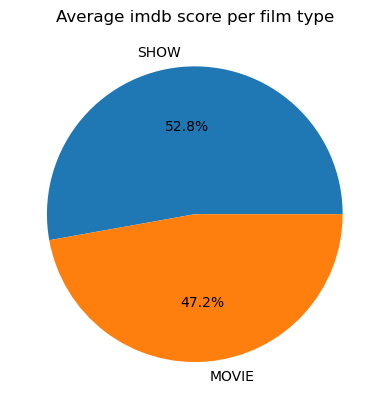

In [48]:
# creating the pie chart for the mean foe the imdb_score
plt.pie(Mean['imdb_score'], labels=Mean.index, autopct='%1.1f%%')
plt.title('Average imdb score per film type')

based on the pie chart we can get the following insights:

● the film type show has a higher average imdb score than Movie

● Both film type have almost similar imdb score

with this insight we can see that the average movie imdb score is lower than the average imdb score of the shows. This means that Netflix need to focus in acquiring higher ranking movie rather than high ranking show

# how many movies and shows was produced throught the year in the netfix catalogue?

In [49]:
# calculating the amount of film type released per year
Count = netflix.groupby(['release_year', 'type']).size().unstack(fill_value=0)
Count

type,MOVIE,SHOW
release_year,,
1953,1,0
1954,1,0
1956,1,0
1958,1,0
1959,1,0
...,...,...
2018,398,259
2019,416,253
2020,359,226


Text(0, 0.5, 'Movies and Shows')

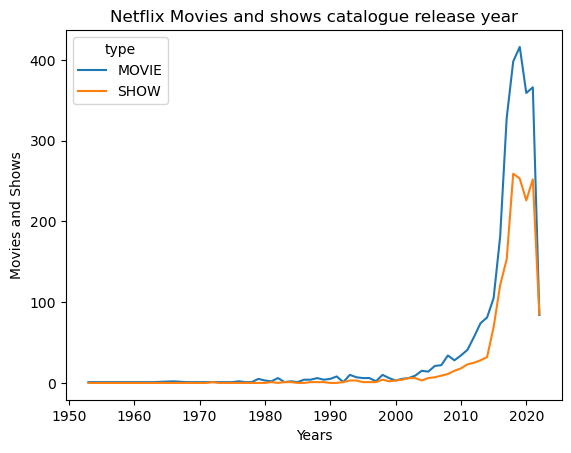

In [50]:
# creating the line chart for both movie and show
Count.plot(kind='line')
plt.title('Netflix Movies and shows catalogue release year')
plt.xlabel('Years')
plt.ylabel('Movies and Shows')

based on the line chart we could get the following insight:

● we can see that overall netflix has acquired more movie compared to shows

● Netflix acquired many movies and shows released around the year 2019

● Netflix did not acquire much movie or show made before 2012

● Netflix acquired almost the same amount of movie and show released at the year 2022

with this insight we can see that netflix prefer to acquire more recent movies and shows. Netflix could perhaps try to acquire a more balance selection of movie released on multiple years instead of acquiring mostly movie around 2019

# which age_certification have the highest Imdb votes?

In [51]:
# calculating the imdb_votes grouped by age_certification
Age = netflix[['age_certification', 'imdb_votes']].groupby('age_certification').max()
Age

,imdb_votes
age_certification,
G,23076
NC-17,14501
PG,23917
PG-13,24319
R,24063
TV-14,24142
TV-G,24224
TV-MA,24046
TV-PG,24164


Text(0, 0.5, 'imdb votes')

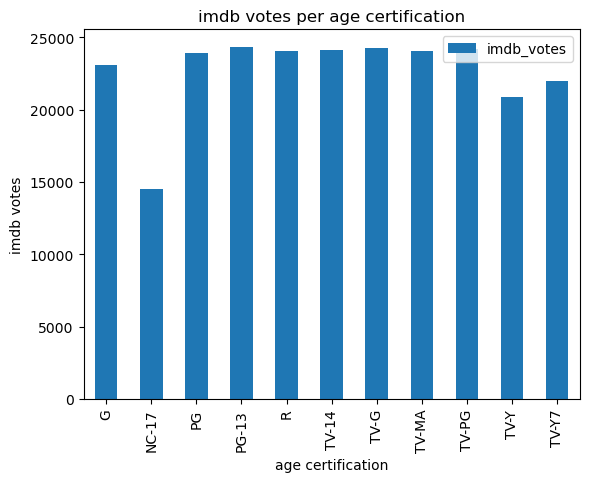

In [52]:
# creating the bar chart
Age.plot(kind='bar')
plt.title('imdb votes per age certification')
plt.xlabel('age certification')
plt.ylabel('imdb votes')

based on the bar chart we can get the following insights:

● imdb max votes is mostly equal on all age certification except for the certification NC-17

● movies certification with the lowest maximum imdb votes is NC-17

● show certification with the lowest maximum imdb votes is TV-Y

based on this insight we can see that the overall amount of votes are equal with the film type movie NC-17 having the least votes. This means that people Netflix users is not that interested in movies with NC-17 rating so they could focus less on it

# What is the top 5 shows and films with the highest imdb rating

In [53]:
# calculating the top 5 film from the type movie and show 
movies = netflix[netflix['type'] == 'MOVIE']
shows = netflix[netflix['type'] == 'SHOW']

top5_movies = movies.sort_values(by='imdb_score', ascending=False).head(5)
top5_shows = shows.sort_values(by='imdb_score', ascending=False).head(5)

top5_moviesscore = top5_movies[['title','imdb_score']]
top5_showsscore = top5_shows[['title','imdb_score']]

print(top5_moviesscore)
print(top5_showsscore)

                                     title  imdb_score
2075                     C/o Kancharapalem         9.0
12                          No Longer Kids         9.0
532   Chhota Bheem & Krishna in Mayanagari         9.0
3381                   Sky Tour: The Movie         8.8
268                    A Lion in the House         8.7
                    title  imdb_score
2176             #ABtalks         9.6
388              Khawatir         9.6
896            Reply 1988         9.2
3807  Who Rules The World         9.2
1378            My Mister         9.2


Text(0.5, 1.0, 'Top-5 highest rated movies ')

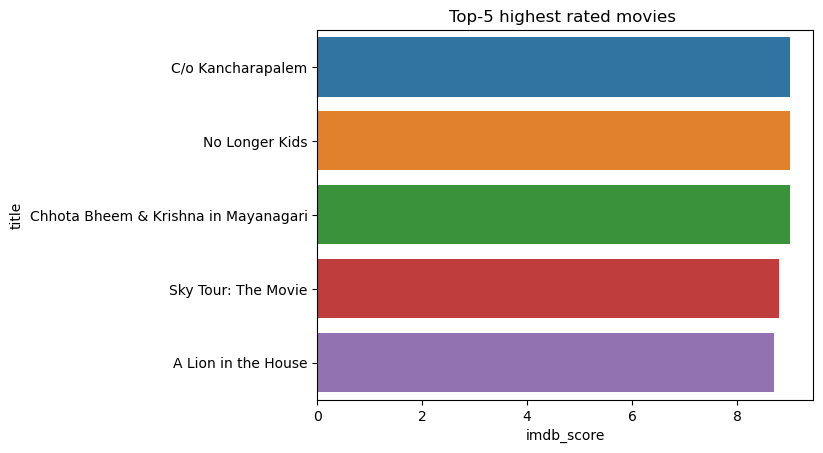

In [54]:
# creating the bar chart for the top 5 highest rated movies
plt.figure()
sns.barplot(x='imdb_score', y='title', data=top5_moviesscore)
plt.title('Top-5 highest rated movies ')

Text(0.5, 1.0, 'Top-5 highest rated shows ')

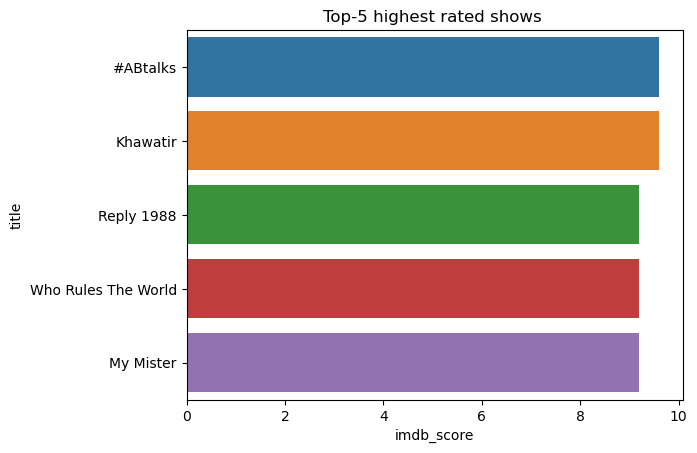

In [55]:
# creating the bar chart for the top 5 highest rated shows
plt.figure()
sns.barplot(x='imdb_score', y='title', data=top5_showsscore)
plt.title('Top-5 highest rated shows ')

based on the bar charts we can get the following insights:

● shows has an overall highest rating at 9.6 compared to movies 9.0

● Both show and movie has a high maximum rating of around 9

● overall there is almost no difference between the highest rated movies and shows

based on this insight we can see that overall the highest ranked movies and films are quiet similar only differing a small amount based on the top 5 ranking. in order to increase rating we need to identify what makes these films have such a high ranking perhaps due to its genre or popularity among fans

# do people prefer to watch older or newer film (pre and post 2000)? 

In order to answer this questions we will make the following hypotheses which will be answered below:

H0:average view count for older films == new films

H1:average view count for older films != new films

In [56]:
# defining the value of old and new films
old_films = netflix[netflix['release_year'] <= 2000][['title', 'imdb_votes']].groupby(['title']).sum() 
new_films = netflix[netflix['release_year'] > 2000][['title', 'imdb_votes']].groupby(['title']).sum() 


In [57]:
#calculating the t statistics and p value 
t_stat, p_val = stats.ttest_ind(old_films['imdb_votes'],new_films['imdb_votes'])
print('T-Statistic:',t_stat)
print('P-value:',p_val) 

T-Statistic: -0.19078724504954708
P-value: 0.8487010127946437


based on the two sampled t-test we can get the following insights:

● people either prefer to watch old films or new films a bit less than the other by a small margin

● the p value is more than the usual critical value of 0.05/5% meaning we fail to reject the null hypothesis

● in conclusion it means that people dont have a preference on watching old to newer films

based on this insight we can conclude that there are no significant difference between people preference to old or new film. So netflix could also try to branch to acquire older film as the customer preference are the same regardless.


# what is the spread of movies and shows runtime?

In [58]:
# calculating the quantile of the shows runtime
min_value = netflix['runtime'].min()
q1d = netflix['runtime'].quantile(0.25)
q2d = netflix['runtime'].quantile(0.5)
q3d = netflix['runtime'].quantile(0.75)
max_value = netflix['runtime'].max()

iqr = q3d - q1d
print('Min:',min_value)
print('Q1:',q1d)
print('Q2:',q2d)
print('Q3:',q3d)
print('Interquartile Range (IQR):',iqr)
print('Max:',max_value)

Min: 0
Q1: 45.0
Q2: 82.0
Q3: 103.0
Interquartile Range (IQR): 58.0
Max: 235


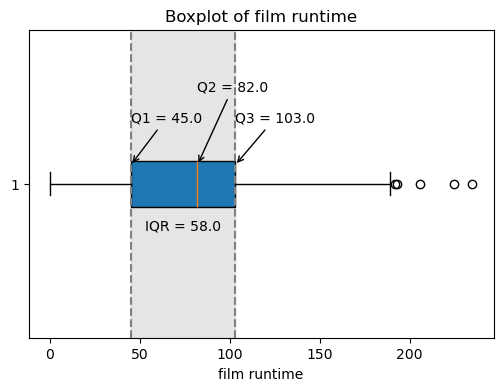

In [59]:
#creating the box plot 
plt.figure(figsize=(6, 4))
plt.boxplot(netflix['runtime'], vert=False, patch_artist=True)

plt.annotate(f'Q1 = {q1d}', xy=(q1d, 1.06), xytext=(q1d, 1.2), arrowprops=dict(facecolor='black', arrowstyle='->'))
plt.annotate(f'Q2 = {q2d}', xy=(q2d, 1.06), xytext=(q2d, 1.3), arrowprops=dict(facecolor='black', arrowstyle='->'))
plt.annotate(f'Q3 = {q3d}', xy=(q3d, 1.06), xytext=(q3d, 1.2), arrowprops=dict(facecolor='black', arrowstyle='->'))
plt.annotate(f'IQR = {iqr}', xy=((q1d+q3d)/2, 0.85), ha='center')

plt.axvline(q1d, linestyle='--', color='gray', label='Q1')
plt.axvline(q3d, linestyle='--', color='gray', label='Q3')
plt.axvspan(q1d, q3d, alpha=0.2, color='gray', label='IQR')

plt.xlabel('film runtime')
plt.title('Boxplot of film runtime')

plt.show()

based on the boxplot we can get the following insights:

● from Q1 we can see that 25% of the movie and show have a run time less than 45 minutes

● from Q2 we can see that 50% of the movie and show have a run time less than 82 minutes

● from Q3 we can see that 75% of the movie and show have a run time less than 103 minutes

● there exists outliers that exceed the max value of the whiskers

From this insight we can see that most movie and tv shows falls on a runtime between 45-103 minutes. This is helpfull for the next question where we will see whether higher runtime affect a movie or show's rating

# do people rate longer runtime movie higher?


In order to answer this questions we will make the following hypotheses which will be answered below:

H0: there is no relationship between runtime and rating 

H1: there is relationship between runtime and rating

In [60]:
# creating the contingency table and calculating the p-value
contingency_table = pd.crosstab(netflix['runtime'],netflix['imdb_score']) #membuat contingency table
pval = stats.chi2_contingency(contingency_table) # menghitung p value dari chi square
print("P-value:",pval.pvalue)

P-value: 2.3979574796980597e-18


In [61]:
contingency_table

imdb_score,1.5,1.6,1.7,1.9,2.0,2.1,2.2,2.3,2.4,2.5,...,8.3,8.4,8.5,8.6,8.7,8.8,8.9,9.0,9.2,9.6
runtime,,,,,,,,,,,,,,,,,,,,,
0,0,0,0,0,0,0,0,0,0,0,...,0,1,0,1,0,1,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,1,1,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
192,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
193,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
206,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


based on the chi square test we can get the following insights:

● the p value is less than the usual critical value of 0.05 meaning we reject the null hypothese

based on this insight we can see that there is a relationship between a movie or show runtime with the rating it gets. this mean that higher runtime could potentially lead to higher rating. but further analysis will need to be used to determine if this is the case

# conclusion

The main objective of this analysis is to increase the overall average rating for both movies and shows to 7% by the end of next month. This is done by finding factors that affects the amount of ratings and vote while also increasing the Netflix catalogue with highly rated movie and shows. After gathering the data of netflix existing movie and shows and their rating, we did some analysis and came up with these conclusion

1. the average imdb score is higher in shows than movies
2. Netflix prioritized in acquiring movies than shows mostly from around the year 2019
3. all age certification have had almost equal votes max votes apart from NC-17
4. both movies and shows has similar top 5 ratings at around 9.0
5. people dont have a preference for older or newer films
6. both movie and shows runtime hover around 45-103 minutes of runtime
7. there is a relationship between a movies rating and shows runtime

Based on this insight we can give some recommendation on what netflix should do in order to improve their ratings. first recommendation is for netflix to focus less on acquiring too many movies and instead focus in acquiring fewer but highly rated movies, potentially one with higher runtime than the 103 minutes. second recommendation is for netflix to focus less in acquiring NC-17 rated movies as it could be one of the reason for the low movie rating compared to shows. lastly netflix could also try to acquire older films aswell instead of only focusing on the newly released as people dont seem to prefer one over the other. With this suggestion we think that netflix could achieve the 7.0 average rating as their best performing movie and show seems to be in the high end already.